In [4]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE



In [6]:
description= pd.read_csv('archive/description.csv')
diets= pd.read_csv('archive/diets.csv')
medications= pd.read_csv('archive/medications.csv')
precautions= pd.read_csv('archive/precautions_df.csv', index_col= 0)
Symptom_severity_df= pd.read_csv('archive/Symptom-severity.csv')
sym_des= pd.read_csv('archive/symtoms_df.csv', index_col= 0)
df= pd.read_csv('archive/Training.csv')
workout=pd.read_csv('archive/workout_df.csv').iloc[:, 2:]
prescription = pd.read_csv("archive/prescription.csv")

In [7]:
# Before Removing Nulls and Duplicate Data
# Create a dictionary with DataFrame names as keys and DataFrames as values 

import time
# Log start time
start_time = time.time()

dataframes = {
    'medications': medications,
    'df': df,
    'Symptom_severity_df': Symptom_severity_df,
    'sym_des': sym_des,
    'description': description,
    'workout': workout,
    'diets': diets,
    'precautions': precautions,
    'prescription': prescription
}

# Loop through each DataFrame and to read dataframe.info
for name, dataf in dataframes.items():
    print(f"DataFrame '{name}':")
    print(dataf.info())
    print('######################################################')  # Just for a line between outputs


# Log end time
end_time = time.time()
# Calculate the time taken
time_taken_before = end_time - start_time
print(print(f'time taken before data cleaning, {time_taken_before:.3f} in milliseconds'))


DataFrame 'medications':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
######################################################
DataFrame 'df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None
######################################################
DataFrame 'Symptom_severity_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
#######################

In [8]:
# Eliminating all NaN from the dataset
# Remove inplace true and doing equals to dataframe to keeping datatype as dataframe
sym_des=sym_des.dropna()
precautions=precautions.dropna()

print("precautions Dataframe\n", precautions.isna().sum())
print("\nSymptons Dataframe\n", sym_des.isna().sum())


precautions Dataframe
 Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

Symptons Dataframe
 Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
dtype: int64


In [9]:
#Removing all Duplicate data from all the Dataframes
medications=medications.drop_duplicates()
df=df.drop_duplicates()
Symptom_severity_df=Symptom_severity_df.drop_duplicates()
sym_des=sym_des.drop_duplicates()
description=description.drop_duplicates()
workout=workout.drop_duplicates()
diets=diets.drop_duplicates()
precautions=precautions.drop_duplicates()
prescription=prescription.drop_duplicates()

In [10]:
# #AFTER Removing Nulls and Duplicate Data from all the Dataframes
# Create a dictionary with DataFrame names as keys and DataFrames as values
import time
# Log start time
start_time = time.time()
dataframes = {
    'medications': medications,
    'df': df,
    'Symptom_severity_df': Symptom_severity_df,
    'sym_des': sym_des,
    'description': description,
    'workout': workout,
    'diets': diets,
    'precautions': precautions,
    'prescription': prescription
}

# Loop through each DataFrame and to read dataframe.info

for name, dataf in dataframes.items():
    print(f"DataFrame '{name}':")
    # print(dataf.isnull().sum())
    # print(dataf.shape)
    print(dataf.info())
    print('######################################################')  # Just for a blank line between outputs


# Log end time
end_time = time.time()
# Calculate the time taken
time_taken_after = end_time - start_time
print(f'time taken after data cleaning {time_taken_after:.3f} in milliseconds vs before datacleaning {time_taken_before:.3f} in milliseconds')


DataFrame 'medications':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
######################################################
DataFrame 'df':
<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 318.2+ KB
None
######################################################
DataFrame 'Symptom_severity_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
############################

In [11]:
time_taken_after

0.06483268737792969

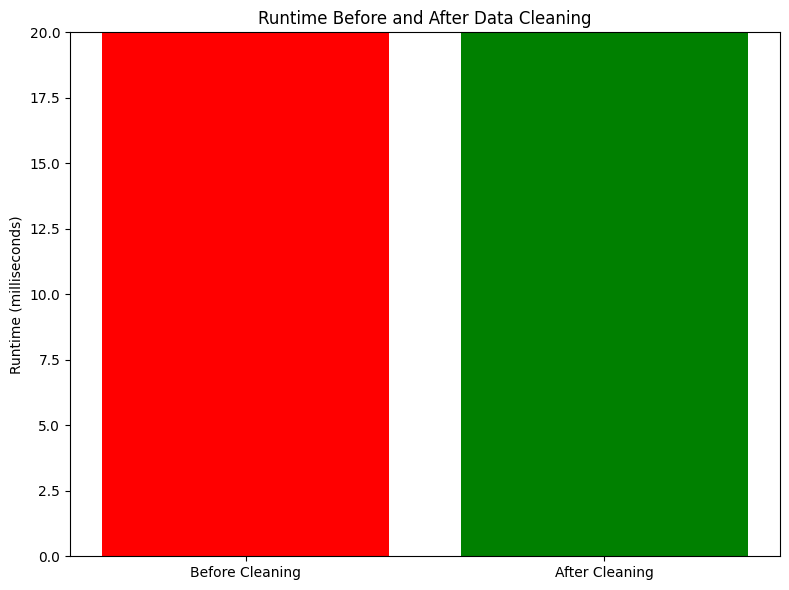

In [12]:

# Calculate the difference in milliseconds
time_difference = (time_taken_before - time_taken_after) * 1000  # Convert to milliseconds

# Prepare data for the bar chart
labels = ['Before Cleaning', 'After Cleaning']
times = [time_taken_before * 1000, time_taken_after * 1000]  # Convert to milliseconds

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, times, color=['red', 'green'])


plt.title('Runtime Before and After Data Cleaning')
plt.ylabel('Runtime (milliseconds)')
plt.ylim(0, 20)
plt.tight_layout()
plt.savefig('jupyter_image/Runtime_Before_After_Data_Cleaning.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution

plt.show()


In [13]:
#sample data
medications.head()

Disease                                         Medication
0     Fungal infection  ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
1              Allergy  ['Antihistamines', 'Decongestants', 'Epinephri...
2                 GERD  ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers...
3  Chronic cholestasis  ['Ursodeoxycholic acid', 'Cholestyramine', 'Me...
4        Drug Reaction  ['Antihistamines', 'Epinephrine', 'Corticoster...

In [14]:
#sample data

Symptom_severity_df.head(5)

Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5

In [15]:
#sample data
sym_des.head(5)


Disease             Symptom_1          Symptom_2  \
0   Fungal infection               itching          skin_rash   
10           Allergy   continuous_sneezing          shivering   
20              GERD          stomach_pain            acidity   
21              GERD          stomach_pain   ulcers_on_tongue   
22              GERD          stomach_pain            acidity   

                Symptom_3             Symptom_4  
0    nodal_skin_eruptions   dischromic _patches  
10                 chills    watering_from_eyes  
20       ulcers_on_tongue              vomiting  
21               vomiting                 cough  
22               vomiting                 cough

In [16]:
#sample Data
description.head(5)

Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...

In [17]:
#Sample Data
workout.head(5)

disease                    workout
0  Fungal infection         Avoid sugary foods
1  Fungal infection         Consume probiotics
2  Fungal infection  Increase intake of garlic
3  Fungal infection     Include yogurt in diet
4  Fungal infection      Limit processed foods

In [18]:
#Sample Data
diets.head(5)

Disease                                               Diet
0     Fungal infection  ['Antifungal Diet', 'Probiotics', 'Garlic', 'C...
1              Allergy  ['Elimination Diet', 'Omega-3-rich foods', 'Vi...
2                 GERD  ['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'...
3  Chronic cholestasis  ['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot...
4        Drug Reaction  ['Antihistamine Diet', 'Omega-3-rich foods', '...

In [19]:
#Sample Data
precautions.head(5)

Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   
5            GERD            avoid fatty spicy food   

                    Precaution_2             Precaution_3        Precaution_4  
0       consult nearest hospital         stop taking drug           follow up  
1                avoid oily food       avoid non veg food  keep mosquitos out  
3                       exercise              eat healthy    get proper sleep  
4   stop bleeding using pressure           consult doctor          salt baths  
5  avoid lying down after eating  maintain healthy weight            exercise

In [20]:
#Sample Data
df.head(5)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [21]:
# Create a dictionary with DataFrame names as keys and DataFrames as values

new_dataframes = {
    'medications': medications,
    'df': df,
    'Symptom_severity_df': Symptom_severity_df,
    'sym_des': sym_des,
    'description': description,
    'workout': workout,
    'diets': diets,
    'precautions': precautions,
    'prescription': prescription
}
import os

# Create the directory if it doesn't exist
os.makedirs("archive/newfiles/", exist_ok=True)

# Loop through the dictionary and write each DataFrame to a CSV file
for name, dataframe in new_dataframes.items():
    filename = f'{name}.csv'
    filepath = f'archive/newfiles/{filename}'
    dataframe.to_csv(filepath, index=False)
    print(f'Saved {filename}')


Saved medications.csv
Saved df.csv
Saved Symptom_severity_df.csv
Saved sym_des.csv
Saved description.csv
Saved workout.csv
Saved diets.csv
Saved precautions.csv
Saved prescription.csv


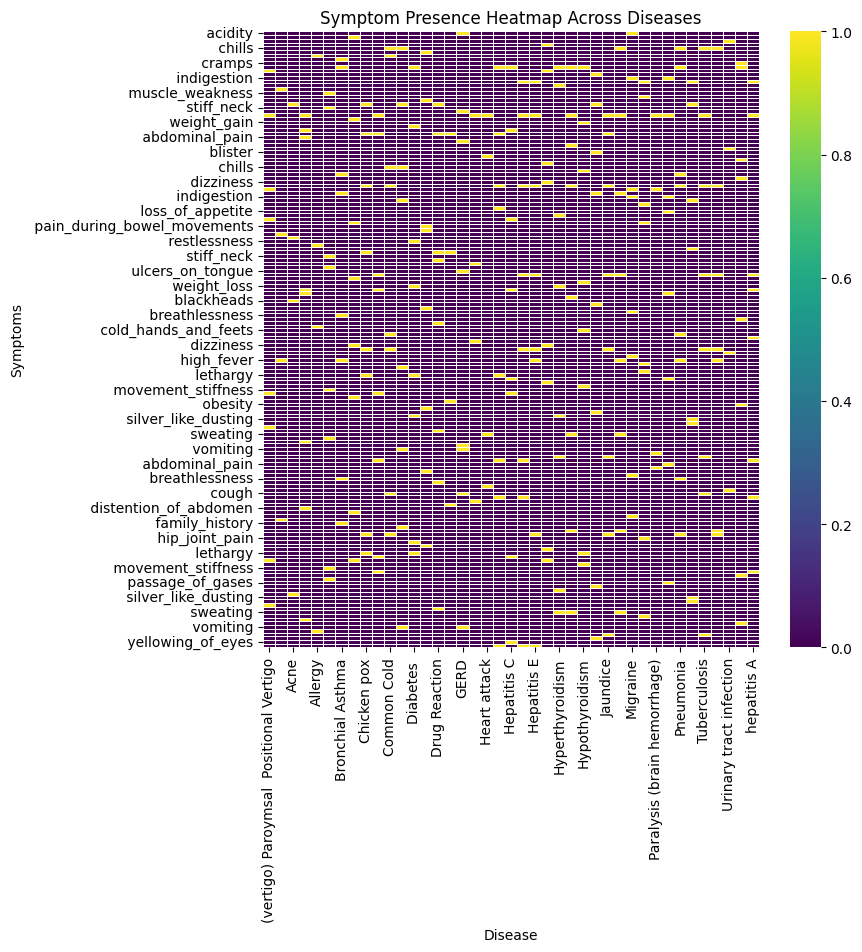

In [22]:
#Heatmap Diesease and their Symptoms contained in sym_des Dataframe
# Creating a boolean DataFrame for symptoms presence
symptoms_encoded = pd.get_dummies(sym_des.drop(columns=['Disease']), prefix='', prefix_sep='')

# # # Grouping by Disease to combine similar records
symptoms_encoded = symptoms_encoded.groupby(sym_des['Disease']).max()
# # Generating the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(symptoms_encoded.T, cmap='viridis', cbar=True, linewidths=.5)
plt.title('Symptom Presence Heatmap Across Diseases')
plt.xlabel('Disease')
plt.ylabel('Symptoms')
plt.savefig('jupyter_image/symptom_presence_heatmap.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()


In [23]:
import pandas as pd
import plotly.graph_objects as go

#save raw data into of symptoms and disease 
data = sym_des

# Combine all symptoms into a single column
symptoms = pd.concat([data['Symptom_1'], data['Symptom_2'], data['Symptom_3'], data['Symptom_4']])

# Count the frequency of each symptom and get the top 5
symptom_counts = symptoms.value_counts().head(5)

# Get the top 5 symptoms
top_symptoms = symptom_counts.index

# Find the diseases associated with the top 5 symptoms
associated_diseases = data[data[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']].apply(lambda row: any(symptom in row.values for symptom in top_symptoms), axis=1)]

# Prepare data for Plotly Sankey diagram
sources = []
targets = []
values = []

# Map each symptom to an index
symptom_indices = {symptom: i for i, symptom in enumerate(top_symptoms)}

# Start assigning indices for diseases after symptoms
disease_indices = {disease: i + len(top_symptoms) for i, disease in enumerate(associated_diseases['Disease'].unique())}

# Create the links between symptoms and diseases
for i, symptom in enumerate(top_symptoms):
    for disease in associated_diseases['Disease'].unique():
        if disease in associated_diseases[associated_diseases['Symptom_1'] == symptom]['Disease'].values or \
           disease in associated_diseases[associated_diseases['Symptom_2'] == symptom]['Disease'].values or \
           disease in associated_diseases[associated_diseases['Symptom_3'] == symptom]['Disease'].values or \
           disease in associated_diseases[associated_diseases['Symptom_4'] == symptom]['Disease'].values:
            sources.append(symptom_indices[symptom])
            targets.append(disease_indices[disease])
            values.append(1)  # Each link represents one connection

# Define node labels (symptoms and diseases)
labels = [f'Symptom: {symptom}' for symptom in top_symptoms] + [f'Disease: {disease}' for disease in disease_indices.keys()]

# Create the Plotly Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram: Top 5 Symptoms and Associated Diseases", font_size=10)
fig.show()


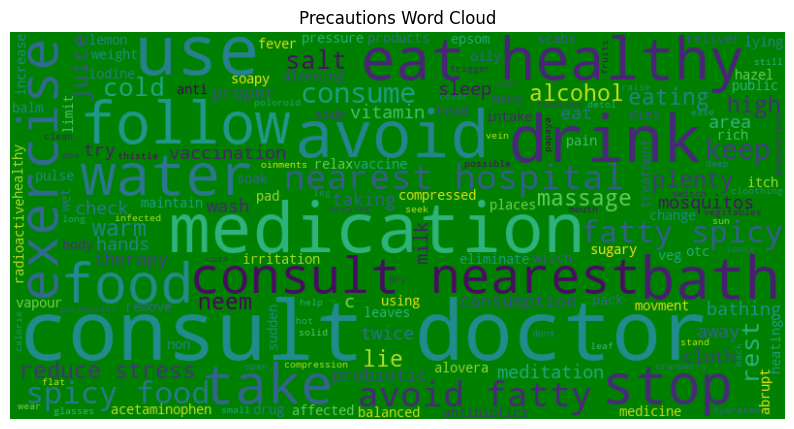

In [24]:
# Wordcount of precuataions usage in various disease, built using precautions dataframe
from wordcloud import WordCloud

# Ensure all data is converted to string before joining
precautions_visual = precautions.drop(columns=['Disease']).fillna('')

# # Convert all values to string and combine into a single text
precautions_text = " ".join(precautions_visual.applymap(str).values.flatten())

# # Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='green').generate(precautions_text)

# # Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Precautions Word Cloud')
plt.savefig('jupyter_image/precautions_wordcloud.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()


In [25]:
# groups the data by each precaution and counts how many times each one appears across all diseases.

import plotly.express as px

# Reshape the DataFrame to have one column per precaution type
precautions_melted = precautions.melt(id_vars=['Disease'], var_name='Precaution_Type', value_name='Precaution')

# Count the occurrence of each precaution for each disease
precautions_count = precautions_melted.groupby(['Precaution']).size().reset_index(name='Count')


# Create the bar plot using Plotly
fig = px.bar(precautions_count, x='Precaution', y='Count', 
             title='Total Count of Each Precaution Across All Disease',
             labels={'Count': 'Number of Precautions'},
             height=600)


# Update layout for better visibility
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

# # Save the figure as a high-resolution PNG image
# fig.write_image('precautions_bar_plot.png', format='png', scale=3)  # Adjust scale for higher resolution

# Show the interactive plot
fig.show()


In [26]:
X = df.drop('prognosis' ,axis=1)
y = df['prognosis']


In [27]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)


In [28]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((243, 132), (61, 132), (243,), (61,))

In [30]:
# Here we can train the top best models which can give best accuracy

# Dictionary to store the accuracy of each model
accuracy_scores = {}

models = {
      'SVC' : SVC(kernel='linear'),
      'Random Forest' : RandomForestClassifier(random_state=42, n_estimators=100),
      'KNeighbors' : KNeighborsClassifier(n_neighbors=5),
      'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
      'MultinomialNB' : MultinomialNB() 
}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Test model
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Store accuracy
    accuracy_scores[model_name] = accuracy
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    # Print results
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} confusion matrix :")
    print(np.array2string(cm, separator=', '))

# At this point, `accuracy_scores` contains the accuracy of each model.


SVC accuracy : 1.0
SVC confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
Random Forest accuracy : 1.0
Random Forest confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
KNeighbors accuracy : 0.9508196721311475
KNeighbors confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
Gradient Boosting accuracy : 0.8360655737704918
Gradient Boosting confusion matrix :
[[2, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 3, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 2]]
MultinomialNB accuracy : 0.9672131147540983
MultinomialNB confusion matrix :
[[2, 0, 0, ...,

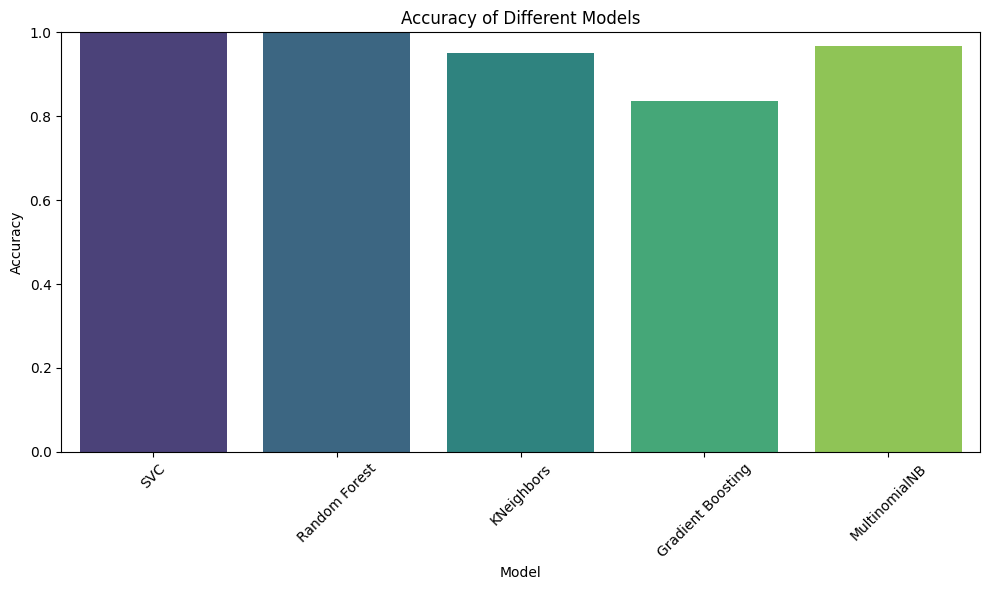

In [31]:

# Convert the dictionary to a DataFrame for easier plotting with Seaborn
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Plotting the accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jupyter_image/Accuracy_of_Different_Models.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()


In [32]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_pred,y_test)
acc

1.0

In [33]:
# Path to save the model
path = 'archive/working_1//svc.pkl'
# Ensure the directory exists
os.makedirs(os.path.dirname(path), exist_ok=True)

# Save the model
with open(path, 'wb') as file:
    pickle.dump(svc, file)

In [34]:
# load the data-set
svc = pickle.load(open(path,'rb'))

In [35]:
# 2d array convert
X_test.iloc[0].values.reshape(1,-1)


array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [36]:
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Get feature rankings
feature_importances = rfe.ranking_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_importances
})

# Sort the DataFrame by importance (lower ranking means more important)
features_df = features_df.sort_values(by='Rank')

print("Most Influential Variables:")

features_df.head()

Most Influential Variables:


Feature  Rank
14           fatigue     1
11          vomiting     2
25        high_fever     3
35  loss_of_appetite     4
31          headache     5

In [37]:
# now take a pred on this 2d array to check that our model pred correctly or not

# test 1 :
print('Model Predictions :',svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print('Actual Labels :', y_test[0])

Model Predictions : [22]
Actual Labels : 22


In [38]:
# test 2 :
print('Model Predictions :',svc.predict(X_test.iloc[40].values.reshape(1,-1)))
print('Actual Labels :', y_test[40])

Model Predictions : [28]
Actual Labels : 28


In [39]:
confusion = confusion_matrix(y_test, predictions)
print(confusion)

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


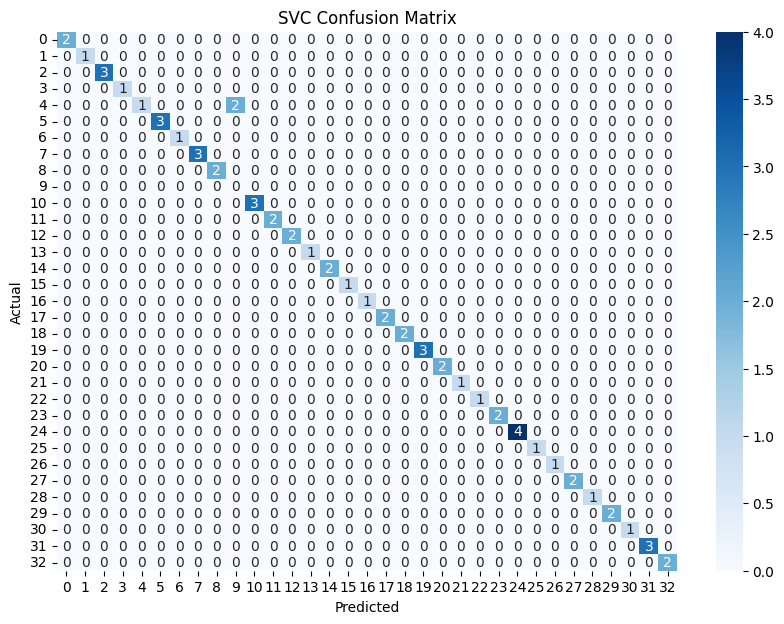

In [40]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.savefig('jupyter_image/SVC_Confusion_Matrix.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution

plt.show()

In [41]:
classification = classification_report(y_test, predictions)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00    

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

Overall Accuracy: 1.0


In [43]:
print(y_test)

[22 19  8 24  6  4 11 20 21 33  4 29 12 22 11 12 11 36 26 40 39  0 24 14
 19 13 25 30 39  8 40  2 34  1  9  0 30 32  9  6 28 30 34  8  4 38  2 30
 35 39 25 25  6  7  2 26 13 29 27 36  3]


In [44]:
def helper(dis): # this funtion can give us the symptoms Description,Precautions,Medication,Diet plan,workout 
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']
    
    pres = prescription[prescription['Disease'] == dis]['prescription']
    pres = [pres for pres in pres.values] 
    
    return desc,pre,med,die,wrkout,pres

# here i create a dictonary 1- symptoms and list 1- diseases because we transform our data in lobelEncoder (0,1) but the patient or user can not understand that which number represented the disease or symptom 

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def given_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [45]:
symptoms = input("Enter your symptoms.......")
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
# Remove any extra characters, if any
predicted_disease = given_predicted_value(user_symptoms)

desc, pre, med, die, wrkout, pres = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

print("=================prescription==================")
for pr_i in pres:
    print(i, ": ", d_i)
    i += 1

Enter your symptoms....... itching


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
=================prescription==================
17 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut o

In [46]:
## Finding difference in importances across random states
## Need to create this for later
all_importances_df = pd.DataFrame()
for i in range(1, 10):
    rf_model = RandomForestClassifier(n_estimators=500, random_state=i)
    rf_model = rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    rf_feature_importances = rf_model.feature_importances_

    iteration_df = pd.DataFrame({
        'Feature': X_train.columns,
        f'Importance_{i}': rf_feature_importances
    })
    
    ##Set up if condition for first iteration
    if all_importances_df.empty:
        all_importances_df = iteration_df

    else:
        all_importances_df = pd.merge(all_importances_df, iteration_df, on='Feature', how='outer')
print("Most Influential Variables:")
print(all_importances_df)

Most Influential Variables:
                   Feature  Importance_1  Importance_2  Importance_3  \
0           abdominal_pain      0.014285      0.014293      0.015414   
1    abnormal_menstruation      0.006982      0.007237      0.006959   
2                  acidity      0.007624      0.009189      0.009404   
3      acute_liver_failure      0.006795      0.005833      0.006751   
4        altered_sensorium      0.009479      0.008913      0.008866   
..                     ...           ...           ...           ...   
127            weight_loss      0.013491      0.014270      0.015321   
128      yellow_crust_ooze      0.004375      0.003825      0.004470   
129           yellow_urine      0.006298      0.006314      0.008645   
130      yellowing_of_eyes      0.018756      0.019138      0.018682   
131         yellowish_skin      0.012785      0.012575      0.011955   

     Importance_4  Importance_5  Importance_6  Importance_7  Importance_8  \
0        0.014082      0.01362

In [47]:
## Analysis: How much does the importance of each feature vary across the different random states?
analysis_all_importances_df = pd.DataFrame()
analysis_all_importances_df['Mean'] = all_importances_df.iloc[:, 1:].mean(axis=1)
analysis_all_importances_df['Median'] = all_importances_df.iloc[:, 1:].median(axis=1)
analysis_all_importances_df['Min'] = all_importances_df.iloc[:, 1:].min(axis=1)
analysis_all_importances_df['Max'] = all_importances_df.iloc[:, 1:].max(axis=1)
analysis_all_importances_df['Std'] = all_importances_df.iloc[:, 1:].std(axis=1)


In [48]:
analysis_all_importances_df['Std'].describe()

count    132.000000
mean       0.000487
std        0.000187
min        0.000000
25%        0.000362
50%        0.000468
75%        0.000619
max        0.001002
Name: Std, dtype: float64

In [49]:
features_rf_df = all_importances_df[['Feature', 'Importance_1']].copy()
features_rf_df.rename(columns={'Importance_1': 'Importance'}, inplace=True)

print(features_rf_df)

                   Feature  Importance
0           abdominal_pain    0.014285
1    abnormal_menstruation    0.006982
2                  acidity    0.007624
3      acute_liver_failure    0.006795
4        altered_sensorium    0.009479
..                     ...         ...
127            weight_loss    0.013491
128      yellow_crust_ooze    0.004375
129           yellow_urine    0.006298
130      yellowing_of_eyes    0.018756
131         yellowish_skin    0.012785

[132 rows x 2 columns]


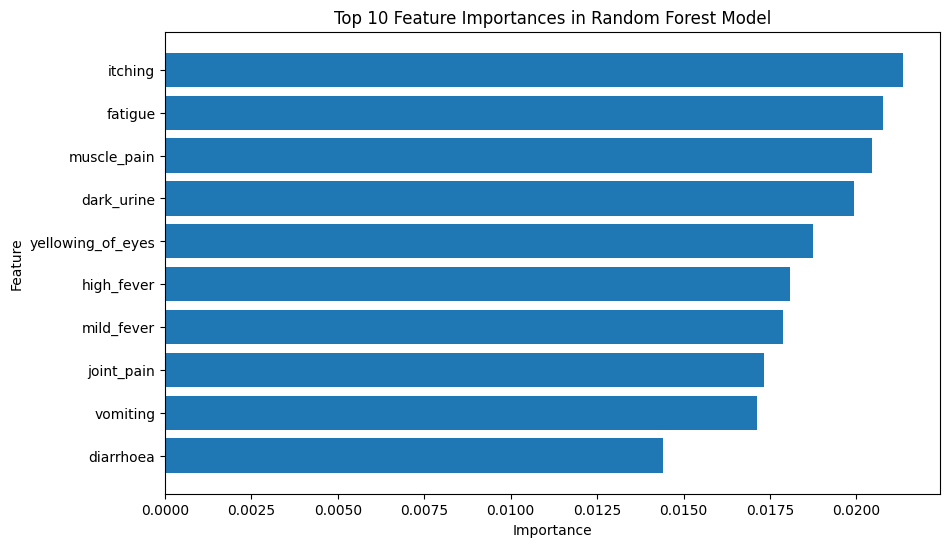

In [50]:
features_rf_df = features_rf_df.sort_values(by='Importance', ascending=False)

top_rf_features = features_rf_df.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.savefig('jupyter_image/Top_10_Feature_Importances_in_Random_Forest_Model.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()

In [51]:
features_rf_ranked = features_rf_df.copy()
features_rf_ranked['RF Rank'] = features_rf_ranked['Importance'].rank(ascending=False)
features_rf_ranked.drop('Importance', axis=1, inplace=True)
features_rf_ranked.head()

Feature  RF Rank
56             itching      1.0
41             fatigue      2.0
69         muscle_pain      3.0
28          dark_urine      4.0
130  yellowing_of_eyes      5.0

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy_rf)

Overall Accuracy: 1.0


In [53]:
classification_rf = classification_report(y_test, y_pred)
print(classification_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         2
          24       1.00    

In [54]:
conf_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_rf)

Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


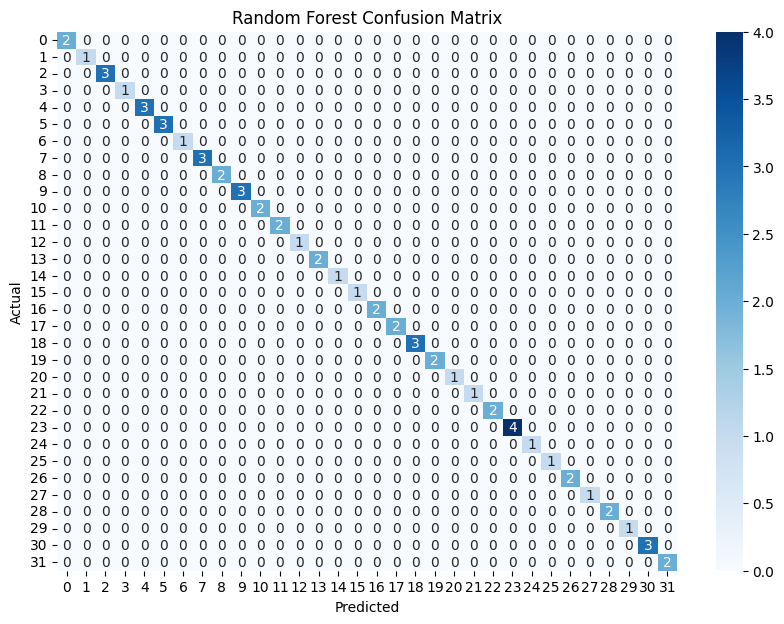

In [55]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.savefig('jupyter_image/RF_Confusion_Matrix.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()

In [56]:
merged_df = pd.merge(features_df, features_rf_ranked, on="Feature", suffixes=('_RFE', '_RF'))
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

merged_df.head()

Feature  Rank  RF Rank  Rank_Difference
0           fatigue     1      2.0              1.0
1          vomiting     2      9.0              7.0
2        high_fever     3      6.0              3.0
3  loss_of_appetite     4     13.0              9.0
4          headache     5     19.0             14.0

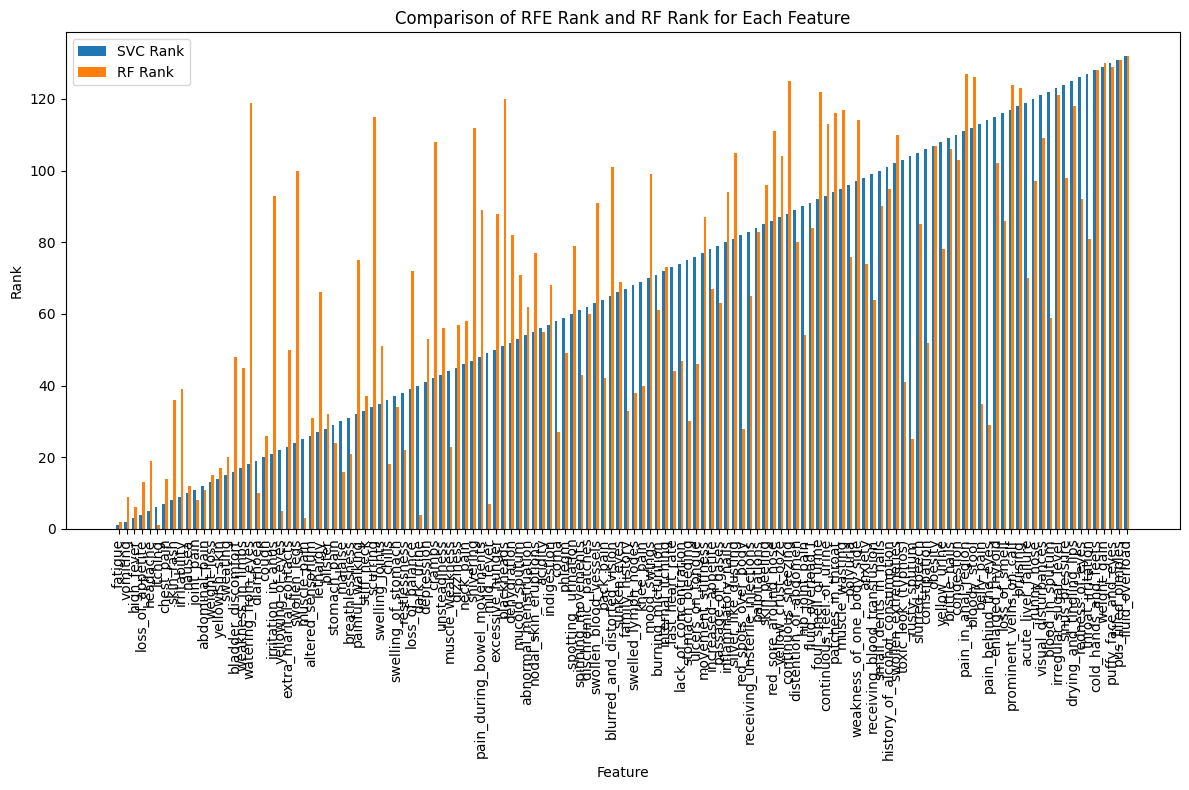

In [57]:
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_df))

# Plot RFE ranks
plt.bar(index, merged_df['Rank'], bar_width, label='SVC Rank')

# Plot RF ranks
plt.bar([i + bar_width for i in index], merged_df['RF Rank'], bar_width, label='RF Rank')

plt.xlabel('Feature')
plt.ylabel('Rank')
plt.title('Comparison of RFE Rank and RF Rank for Each Feature')
plt.xticks([i + bar_width / 2 for i in index], merged_df['Feature'], rotation=90)
plt.legend()


plt.tight_layout()
plt.show()

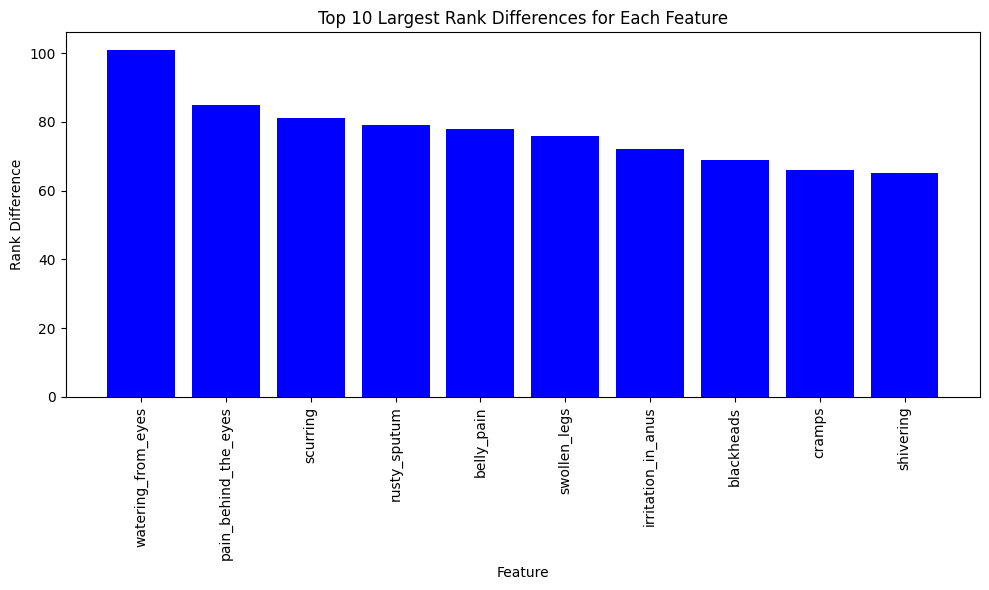

In [58]:
merged_df['Rank_Difference'] = (merged_df['Rank'] - merged_df['RF Rank']).abs()

top_10_df = merged_df.nlargest(10, 'Rank_Difference')

plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Feature'], top_10_df['Rank_Difference'], color='blue')

plt.xlabel('Feature')
plt.ylabel('Rank Difference')
plt.title('Top 10 Largest Rank Differences for Each Feature')
plt.xticks(rotation=90)  

plt.tight_layout()
plt.savefig('jupyter_image/Top_10_Largest_Rank_Differences_for_Each_Feature.png', dpi=300, bbox_inches='tight')  # dpi=300 for high resolution

plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [61]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [62]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation accuracy:", rf_cv_scores.mean())


Cross-validation accuracy: 0.8553005464480876


In [63]:
import numpy as np
noise = np.random.normal(0, 0.1, X.shape)
X_noisy = X + noise


In [64]:
# Assuming X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
y_pred = rf.predict(X_test)


In [67]:
print(classification_report(y_test, y_pred))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.00         2
           Dimorphic hemmor

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming X (features) and y (labels) are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.00         2
           Dimorphic hemmor

In [69]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use cross-validation to check for overfitting
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5)  # 5-fold cross-validation

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


In [70]:
from sklearn.model_selection import train_test_split

# Split the data (X is your feature matrix, y is the target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [71]:
print(y_train.value_counts())


prognosis
Typhoid                                    9
Hepatitis D                                9
Common Cold                                9
Jaundice                                   8
Hepatitis B                                7
Osteoarthristis                            7
Alcoholic hepatitis                        7
GERD                                       7
Dengue                                     7
hepatitis A                                7
Pneumonia                                  7
Hyperthyroidism                            7
Diabetes                                   7
Chicken pox                                7
Hepatitis E                                7
Tuberculosis                               7
Malaria                                    6
Migraine                                   6
Psoriasis                                  6
Hepatitis C                                6
Hypothyroidism                             6
Peptic ulcer diseae                        6


In [72]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)


In [73]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)  # 'rf' is your RandomForest model

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


In [74]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVC model
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [76]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [77]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear', gamma='scale')
svc.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [78]:
from sklearn.model_selection import cross_val_score

# For Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest cross-validation scores: {rf_scores}")
print(f"Random Forest average score: {rf_scores.mean()}")

# For SVC
svc_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(f"SVC cross-validation scores: {svc_scores}")
print(f"SVC average score: {svc_scores.mean()}")


Random Forest cross-validation scores: [1.         0.98360656 0.98360656 0.96721311 1.        ]
Random Forest average score: 0.9868852459016393
SVC cross-validation scores: [1.         0.95918367 0.95918367 0.95833333 0.97916667]
SVC average score: 0.9711734693877551


In [79]:
from sklearn.metrics import classification_report, confusion_matrix

# For Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# For SVC
y_pred_svc = svc.predict(X_test_scaled)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

# Confusion Matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print("Random Forest Confusion Matrix:")
print(cm_rf)

print("SVC Confusion Matrix:")
print(cm_svc)


Random Forest Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.00      0.00      0.00         3
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         3
                       Bronchial Asthma       1.00      1.00      1.00         3
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         3
                    Chronic cholestasis       1.00      1.00      1.00         2
                                 Dengue       1.00      1.00      1.00         3
                              Diabetes        1.00      1.00      1.00 

In [80]:
from sklearn.metrics import classification_report, accuracy_score

# For Random Forest
y_pred_rf = rf.predict(X_test)
classification_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# For SVC
y_pred_svc = svc.predict(X_test_scaled)
classification_svc = classification_report(y_test, y_pred_svc, output_dict=True)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)


In [81]:
# Extract metrics from the classification reports
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# For Random Forest
rf_metrics = {
    'accuracy': accuracy_rf,
    'precision': classification_rf['accuracy'],
    'recall': classification_rf['accuracy'],
    'f1-score': classification_rf['accuracy']
}

# For SVC
svc_metrics = {
    'accuracy': accuracy_svc,
    'precision': classification_svc['accuracy'],
    'recall': classification_svc['accuracy'],
    'f1-score': classification_svc['accuracy']
}


In [82]:
# Extract metrics from the classification reports
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# For Random Forest
rf_metrics = {
    'accuracy': accuracy_rf,
    'precision': classification_rf['accuracy'],
    'recall': classification_rf['accuracy'],
    'f1-score': classification_rf['accuracy']
}

# For SVC
svc_metrics = {
    'accuracy': accuracy_svc,
    'precision': classification_svc['accuracy'],
    'recall': classification_svc['accuracy'],
    'f1-score': classification_svc['accuracy']
}


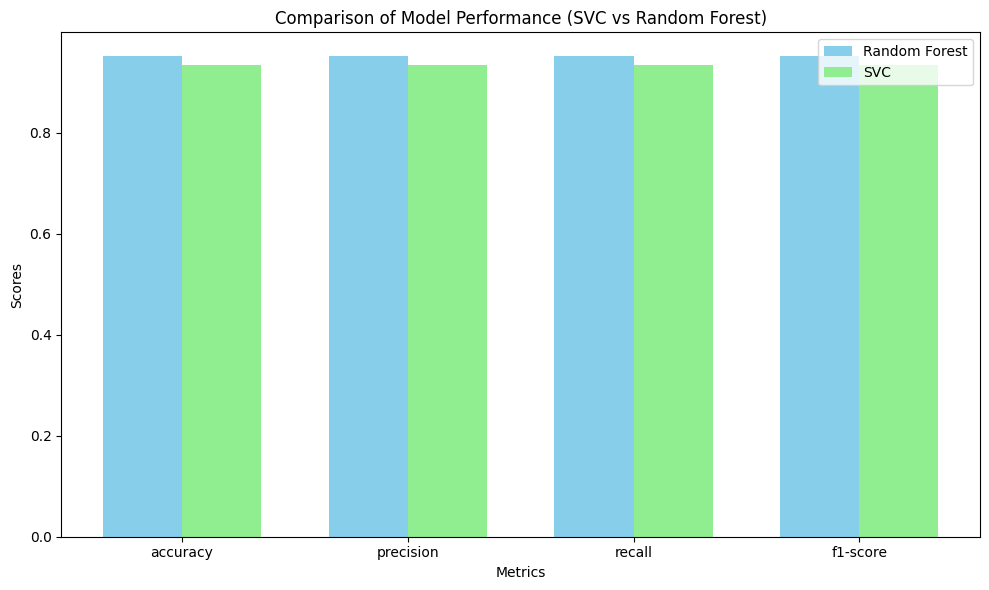

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the bar positions and labels
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Bar for Random Forest
rects1 = ax.bar(index, list(rf_metrics.values()), bar_width, label='Random Forest', color='skyblue')

# Bar for SVC
rects2 = ax.bar(index + bar_width, list(svc_metrics.values()), bar_width, label='SVC', color='lightgreen')

# Labeling the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (SVC vs Random Forest)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [84]:
from sklearn.metrics import accuracy_score

# Predict the test set results with Random Forest
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9508196721311475


In [85]:
# Predict the test set results with SVC
y_pred_svc = svc.predict(X_test_scaled)

# Calculate the accuracy for SVC
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)


SVC Accuracy: 0.9344262295081968


In [86]:
print(df.columns)


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


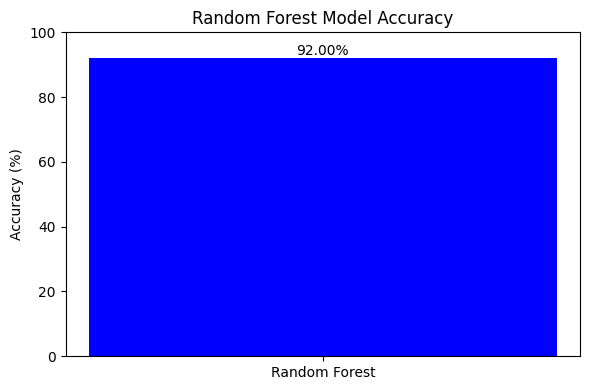

In [87]:
import matplotlib.pyplot as plt

# Assuming `accuracy_rf` contains the accuracy score of the Random Forest model
accuracy_rf = 0.92  # Example accuracy score

# Data for plotting
models = ['Random Forest']
accuracies = [accuracy_rf * 100]  # Convert to percentage

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color='blue')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Model Accuracy')
plt.text(0, accuracies[0] + 1, f'{accuracies[0]:.2f}%', ha='center', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('jupyter_image/Random_Forest_Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


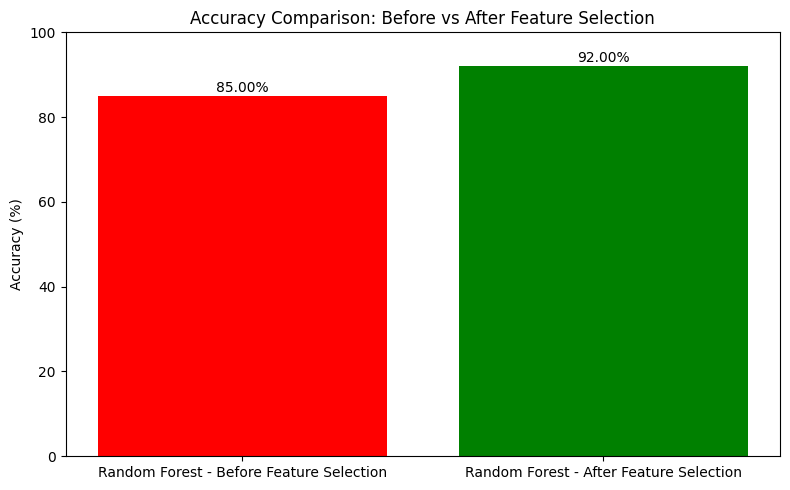

In [88]:
import matplotlib.pyplot as plt

# Example data (Replace with your actual accuracy values)
models = ['Random Forest - Before Feature Selection', 'Random Forest - After Feature Selection']
accuracies = [0.85, 0.92]  # Example accuracy values before and after feature selection

# Plotting the accuracy differences
plt.figure(figsize=(8, 5))
plt.bar(models, [accuracy * 100 for accuracy in accuracies], color=['red', 'green'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: Before vs After Feature Selection')
plt.text(0, accuracies[0] * 100 + 1, f'{accuracies[0] * 100:.2f}%', ha='center', fontsize=10, color='black')
plt.text(1, accuracies[1] * 100 + 1, f'{accuracies[1] * 100:.2f}%', ha='center', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('jupyter_image/Accuracy_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [92]:
# Extract metrics from the classification reports
metrics = ['accuracy', 'precision', 'recall', 'f1-score']

# For Random Forest
rf_metrics = {
    'accuracy': accuracy_rf,
    'precision': classification_rf['accuracy'],
    'recall': classification_rf['accuracy'],
    'f1-score': classification_rf['accuracy']
}



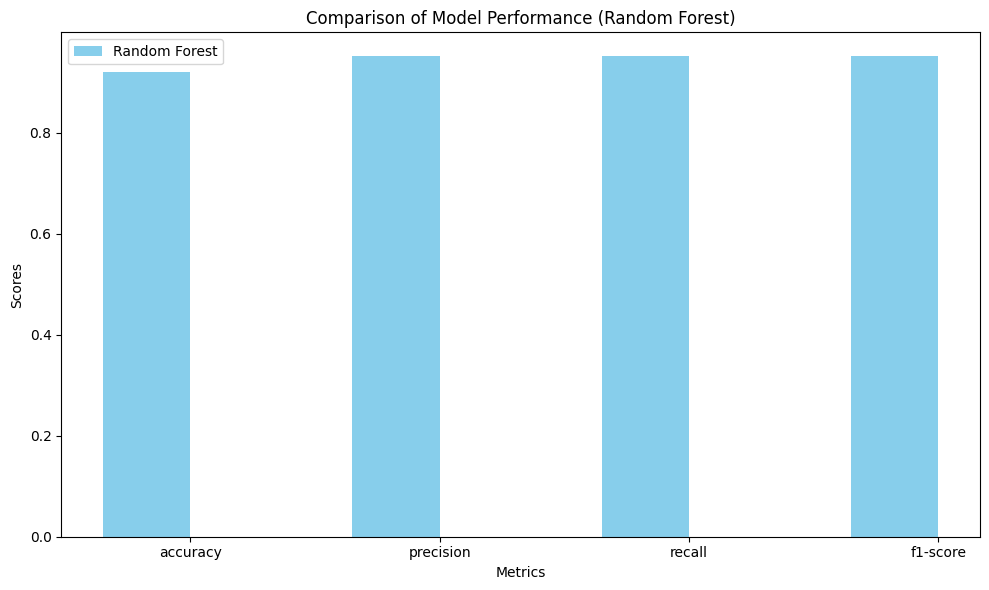

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the bar positions and labels
bar_width = 0.35
index = np.arange(len(metrics))

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 6))

# Bar for Random Forest
rects1 = ax.bar(index, list(rf_metrics.values()), bar_width, label='Random Forest', color='skyblue')


# Labeling the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance (Random Forest)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

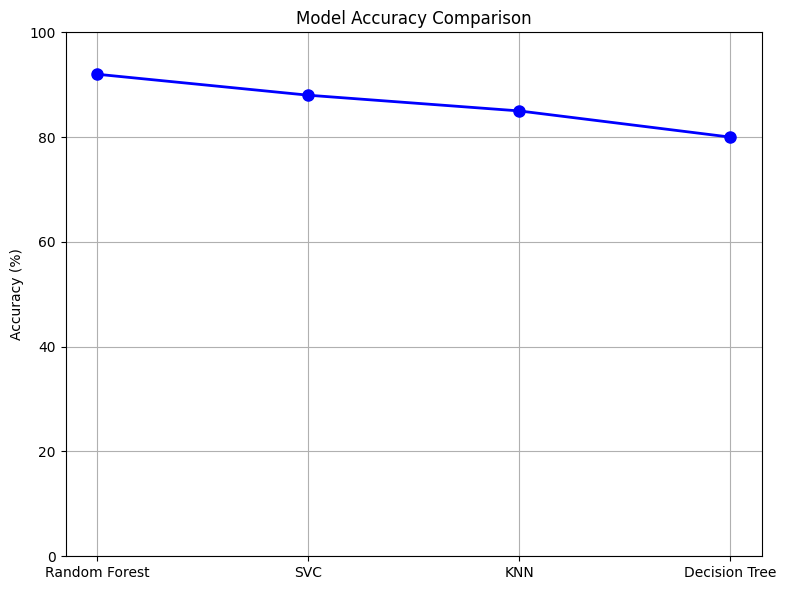

In [95]:
import matplotlib.pyplot as plt

# Example data (Replace with your actual accuracy values)
models = ['Random Forest', 'SVC', 'KNN', 'Decision Tree']
accuracies = [0.92, 0.88, 0.85, 0.80]  # Example accuracy values for each model

# Plotting the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(models, [accuracy * 100 for accuracy in accuracies], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.grid(True)
plt.tight_layout()
plt.savefig('jupyter_image/Model_Accuracy_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()


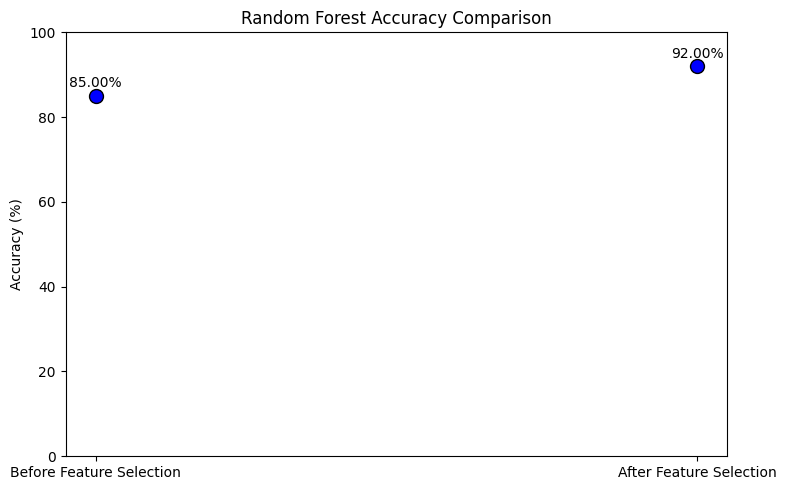

In [96]:
import matplotlib.pyplot as plt

# Example data (Replace with your actual accuracy values for Random Forest)
stages = ['Before Feature Selection', 'After Feature Selection']
accuracies_rf = [0.85, 0.92]  # Example accuracy values

# Plotting the Random Forest accuracy scatter graph
plt.figure(figsize=(8, 5))
plt.scatter(stages, [accuracy * 100 for accuracy in accuracies_rf], color='blue', s=100, edgecolors='black')  # 's' is the size of the marker
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Accuracy Comparison')

# Annotate the points with the accuracy values
for i, accuracy in enumerate(accuracies_rf):
    plt.text(stages[i], accuracy * 100 + 2, f'{accuracy * 100:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('jupyter_image/Random_Forest_Accuracy_Scatter.png', dpi=300, bbox_inches='tight')
plt.show()


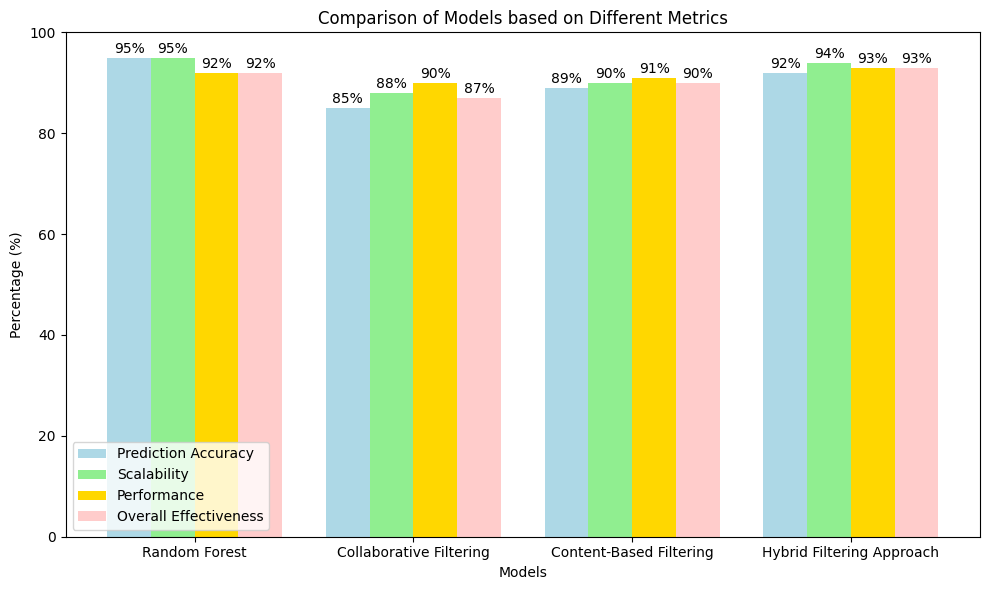

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'Collaborative Filtering', 'Content-Based Filtering', 'Hybrid Filtering Approach']
accuracy = [95, 85, 89, 92]
scalability = [95, 88, 90, 94]
performance = [92, 90, 91, 93]
effectiveness = [92, 87, 90, 93]

# Set up the bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Plotting the bars with lighter colors
plt.figure(figsize=(10, 6))

bar1 = plt.bar(index, accuracy, bar_width, label='Prediction Accuracy', color='#ADD8E6')  # Light Blue
bar2 = plt.bar(index + bar_width, scalability, bar_width, label='Scalability', color='#90EE90')  # Light Green
bar3 = plt.bar(index + 2*bar_width, performance, bar_width, label='Performance', color='#FFD700')  # Light Yellow
bar4 = plt.bar(index + 3*bar_width, effectiveness, bar_width, label='Overall Effectiveness', color='#FFCCCB')  # Light Pink

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Models based on Different Metrics')
plt.xticks(index + 1.5*bar_width, models)  # Adjusting x-axis labels
plt.ylim(0, 100)

# Adding the legend
plt.legend()

# Adding values on top of the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', fontsize=10, color='black')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Show the plot
plt.tight_layout()
plt.savefig('jupyter_image/model_comparison_light_colors.png', dpi=300, bbox_inches='tight')  # High resolution image
plt.show()
